In [ ]:
import pandas as pd

In [5]:
import numpy as np

In [17]:
import matplotlib.pyplot as plt

In [18]:
import seaborn as sns

In [7]:
dfjob = pd.read_csv(r"C:\Users\Admin\Downloads\linear Regression\Linear Regression\Outlier Detection Dataset\jobselection.csv")

In [8]:
dfjob

,score,exam_marks,seletec
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0
...,...,...,...
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
998,8.62,46,1


In [9]:
dfjob.isna().sum()

score         0
exam_marks    0
seletec       0
dtype: int64

In [10]:
dfjob.dtypes

score         float64
exam_marks      int64
seletec         int64
dtype: object

<function matplotlib.pyplot.show(close=None, block=None)>

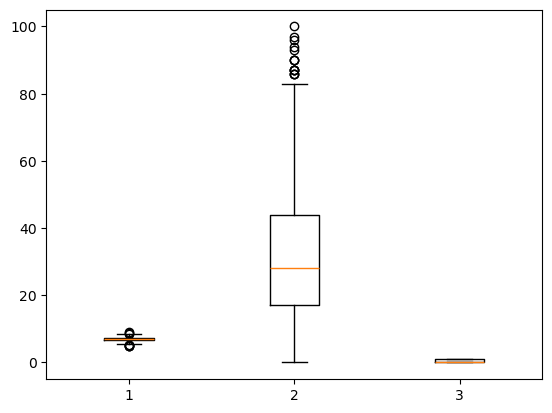

In [20]:
plt.boxplot(dfjob)
plt.show

<Axes: >

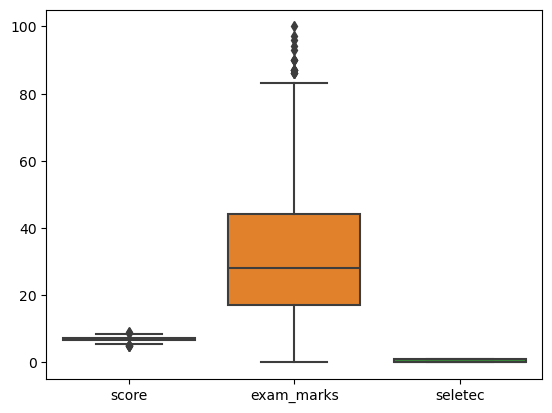

In [22]:
sns.boxplot(dfjob)

<Axes: >

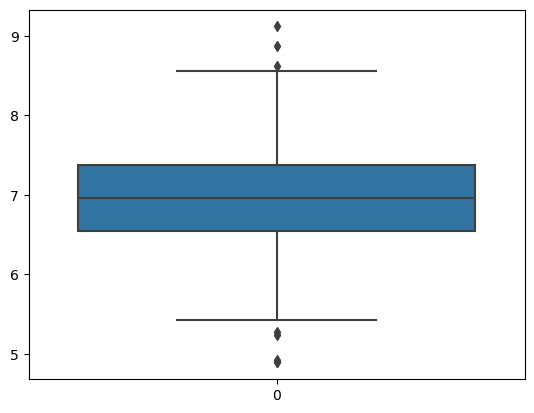

In [26]:
sns.boxplot(dfjob["score"])

In [28]:
dfjob["exam_marks"]

0      26
1      38
2      40
3       8
4      17
       ..
995    44
996    65
997    34
998    46
999    10
Name: exam_marks, Length: 1000, dtype: int64

<Axes: >

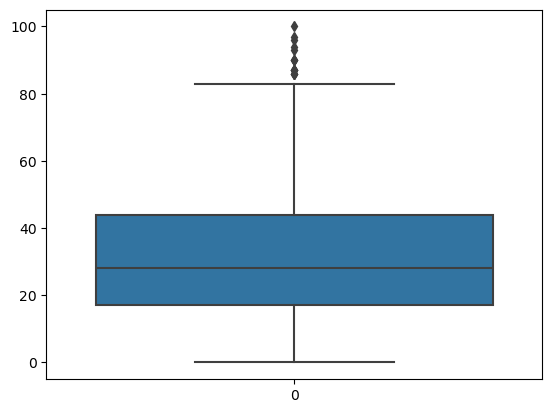

In [29]:
sns.boxplot(dfjob["exam_marks"])

In [30]:
dfjob['score']

0      7.19
1      7.46
2      7.54
3      6.42
4      7.23
       ... 
995    8.87
996    9.12
997    4.89
998    8.62
999    4.90
Name: score, Length: 1000, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

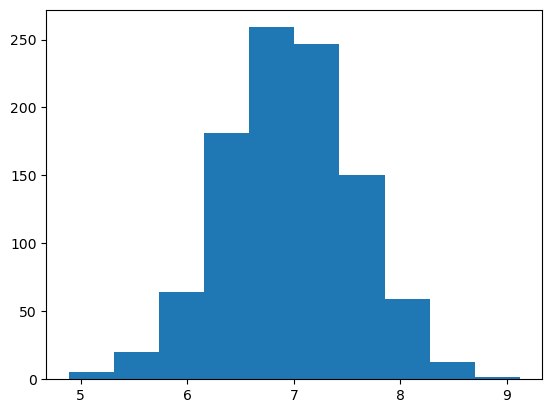

In [32]:
plt.hist(dfjob['score'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

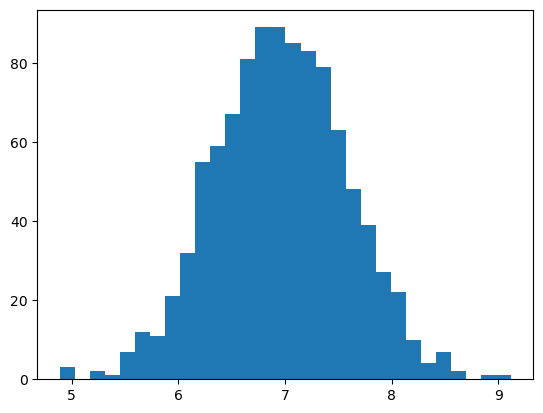

In [34]:
plt.hist(dfjob['score'], bins =30)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

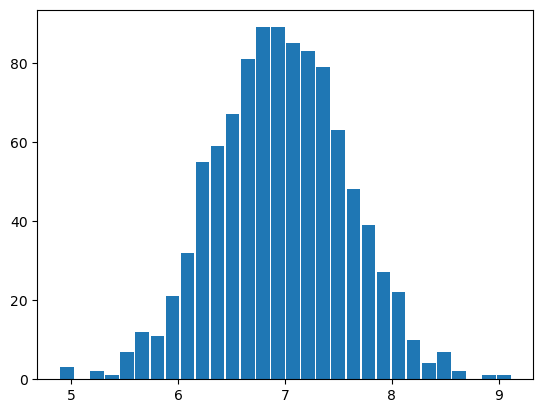

In [35]:
plt.hist(dfjob['score'], bins =30, rwidth = 0.90)
plt.show

In [36]:
dfjob['score'].skew()

-0.014529938929314918

In [37]:
dfjob['score'].skew().round()

-0.0

## Zscore

In [42]:
dfjob['score']

0      7.19
1      7.46
2      7.54
3      6.42
4      7.23
       ... 
995    8.87
996    9.12
997    4.89
998    8.62
999    4.90
Name: score, Length: 1000, dtype: float64

In [43]:
dfjob['score'].mean()

6.96124

In [44]:
m = dfjob['score'].mean()
dfjob['score'].std

<bound method Series.std of 0      7.19
1      7.46
2      7.54
3      6.42
4      7.23
       ... 
995    8.87
996    9.12
997    4.89
998    8.62
999    4.90
Name: score, Length: 1000, dtype: float64>

In [45]:
s = dfjob['score'].std()
s

0.6158978751323894

In [46]:
dfjob['score'].describe()

count    1000.000000
mean        6.961240
std         0.615898
min         4.890000
25%         6.550000
50%         6.960000
75%         7.370000
max         9.120000
Name: score, dtype: float64

In [47]:
(dfjob['score']-m)/s

0      0.371425
1      0.809810
2      0.939701
3     -0.878782
4      0.436371
         ...   
995    3.099150
996    3.505062
997   -3.362960
998    2.693239
999   -3.346724
Name: score, Length: 1000, dtype: float64

In [49]:
from scipy.stats import zscore
zscore(dfjob['score'])

0      0.371611
1      0.810215
2      0.940171
3     -0.879222
4      0.436589
         ...   
995    3.100701
996    3.506815
997   -3.364643
998    2.694586
999   -3.348398
Name: score, Length: 1000, dtype: float64

In [51]:
dfjob['zscore'] = (dfjob['score'] - m)/s
dfjob

,score,exam_marks,seletec,zscore
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371
...,...,...,...,...
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062
997,4.89,34,0,-3.362960
998,8.62,46,1,2.693239


In [55]:
(dfjob['zscore'] < - 3 ) | (dfjob ['zscore'] > 3)

0      False
1      False
2      False
3      False
4      False
       ...  
995     True
996     True
997     True
998    False
999     True
Name: zscore, Length: 1000, dtype: bool

In [56]:
dfjob[(dfjob['zscore'] <- 3) | (dfjob['zscore']>3)]

,score,exam_marks,seletec,zscore
485,4.92,44,1,-3.314251
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


In [57]:
dfjob[(dfjob['zscore'] <- 3) | (dfjob['zscore']>3)].index

Index([485, 995, 996, 997, 999], dtype='int64')

In [58]:
dfjob.drop([485, 995, 996, 997, 999])

,score,exam_marks,seletec,zscore
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371
...,...,...,...,...
991,7.04,57,0,0.127878
992,6.26,12,0,-1.138565
993,6.73,21,1,-0.375452
994,6.48,63,0,-0.781363


In [ ]:
dfjob.drop([485, 995, 996, 997, 999], inplace= True)

In [78]:
dfjob

,score,exam_marks,seletec,zscore
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371
...,...,...,...,...
991,7.04,57,0,0.127878
992,6.26,12,0,-1.138565
993,6.73,21,1,-0.375452
994,6.48,63,0,-0.781363


In [79]:
dfjob["exam_marks"]

0      26
1      38
2      40
3       8
4      17
       ..
991    57
992    12
993    21
994    63
998    46
Name: exam_marks, Length: 995, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

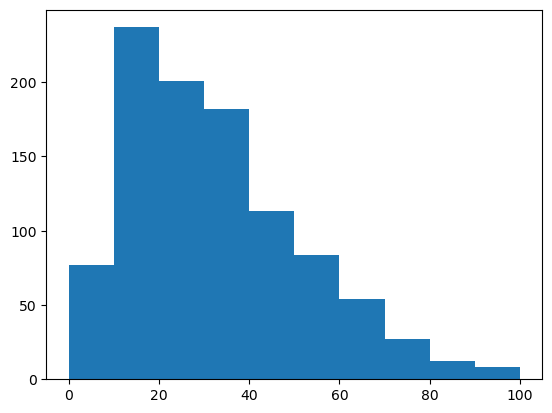

In [82]:
plt.hist(dfjob['exam_marks'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

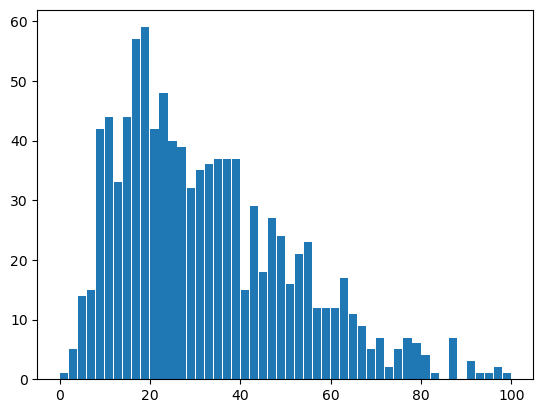

In [87]:
plt.hist(dfjob['exam_marks'], bins = 50, rwidth = 0.90)
plt.show

In [88]:
dfjob['exam_marks'].skew()

0.8416289142941135

In [89]:
dfjob['exam_marks'].skew().round()

1.0